In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [14]:
df = pd.read_csv(r'C:\Users\haric\Downloads\loweelhosp.csv' )

df.head(5)

,Month,Average Licensed Bed Occupancy Rate,"Unassisted Fall Rate per 1,000 Patient Days",Staff Responsiveness Domain Top Box Score,Unassisted Fall %,Staff Responsiveness Domain Top Box Score %,Staff Responsiveness Top Box Score Benchmark
0,Jan-20,96%,2.21,68.34,0.221,0.6834,65
1,Feb-20,96%,1.79,72.75,0.179,0.7275,65
2,Mar-20,81%,1.03,67.07,0.103,0.6707,65
3,Apr-20,94%,1.97,71.21,0.197,0.7121,65
4,May-20,101%,3.41,57.68,0.341,0.5768,65


In [8]:
df.columns = df.columns.str.strip().str.replace(r'\s+', ' ', regex=True)

print(df.columns)


Index(['Month', 'Average Licensed Bed Occupancy Rate',
       'Unassisted Fall Rate per 1,000 Patient Days',
       'Staff Responsiveness Domain Top Box Score', 'Unassisted Fall %',
       'Staff Responsiveness Domain Top Box Score %',
       'Staff Responsiveness Top Box Score Benchmark'],
      dtype='object')


In [9]:
# Display data types of all columns
print(df.dtypes)

Month                                            object
Average Licensed Bed Occupancy Rate              object
Unassisted Fall Rate per 1,000 Patient Days     float64
Staff Responsiveness Domain Top Box Score       float64
Unassisted Fall %                               float64
Staff Responsiveness Domain Top Box Score %     float64
Staff Responsiveness Top Box Score Benchmark      int64
dtype: object


In [158]:
# Convert 'Average Licensed Bed Occupancy Rate' and 'Staff Responsiveness Domain Top Box Score %' to numeric
# If they have '%' symbols, remove the '%' and convert to float
df['Average Licensed Bed Occupancy Rate'] = df['Average Licensed Bed Occupancy Rate'].replace('%', '', regex=True).astype(float) / 100
df['Staff Responsiveness Domain Top Box Score %'] = df['Staff Responsiveness Domain Top Box Score %'].replace('%', '', regex=True).astype(float) / 100

# Check the data types again to confirm the changes
print(df.dtypes)


Month                                            object
Average Licensed Bed Occupancy Rate             float64
Unassisted Fall Rate per 1,000 Patient Days     float64
Staff Responsiveness Domain Top Box Score       float64
Unassisted Fall %                               float64
Staff Responsiveness Domain Top Box Score %     float64
Staff Responsiveness Top Box Score Benchmark      int64
dtype: object


In [159]:
print(df['Staff Responsiveness Domain Top Box Score %'].head(10))


0    0.006834
1    0.007275
2    0.006707
3    0.007121
4    0.005768
5    0.006786
6    0.006609
7    0.007038
8    0.005331
9    0.006755
Name: Staff Responsiveness Domain Top Box Score %, dtype: float64


In [160]:
df['Staff Responsiveness Domain Top Box Score %'] = df['Staff Responsiveness Domain Top Box Score %'] * 100


# Exploratory Data Analysis (EDA)


In [10]:
print(df.describe())

       Unassisted Fall Rate per 1,000 Patient Days  \
count                                    60.000000   
mean                                      2.607833   
std                                       0.500712   
min                                       1.030000   
25%                                       2.310000   
50%                                       2.590000   
75%                                       3.030000   
max                                       3.410000   

       Staff Responsiveness Domain Top Box Score  Unassisted Fall %  \
count                                  60.000000          60.000000   
mean                                   63.087500           0.260783   
std                                     4.148518           0.050071   
min                                    53.310000           0.103000   
25%                                    60.342500           0.231000   
50%                                    63.620000           0.259000   
75%             

# Average KPI Gauge Chart Visualization

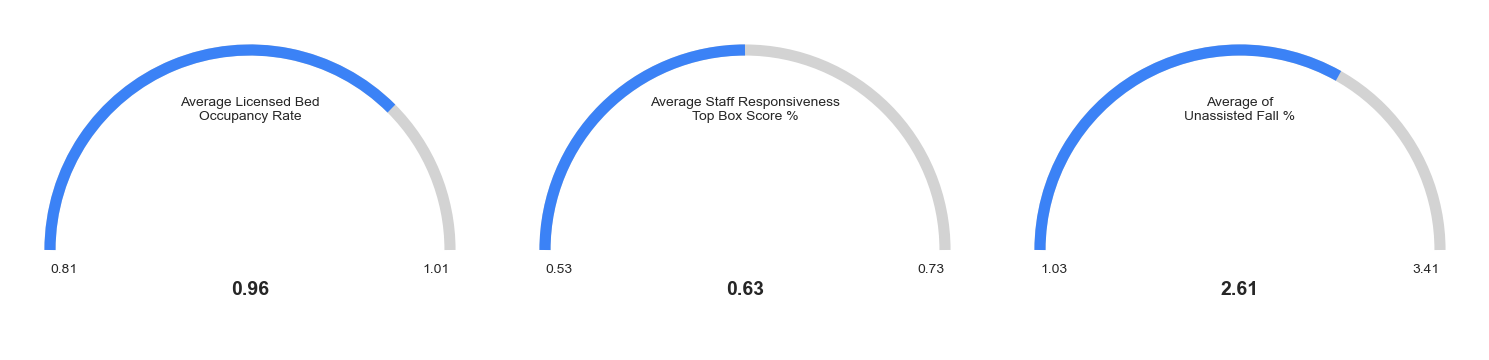

In [162]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Arc

def create_gauge(value, min_val, max_val, avg_val, title, ax):
    # Calculate angles for the gauge (in radians)
    theta = np.linspace(np.pi, 0, 100)  # Reversed to go from right to left
    
    # Calculate normalized positions
    radius = 1
    
    # Create the background arc
    background_arc = Arc((0, 0), 2*radius, 2*radius, 
                        theta1=0, theta2=180, 
                        color='lightgray', linewidth=8)
    ax.add_patch(background_arc)
    
    # Calculate the angle for average value (reversed for right to left)
    avg_angle = 180 * (1 - (avg_val - min_val) / (max_val - min_val))
    
    # Create the colored arc from right to left
    value_arc = Arc((0, 0), 2*radius, 2*radius,
                    theta1=avg_angle, theta2=180,
                    color='#3b82f6', linewidth=8)
    ax.add_patch(value_arc)
    
    # Add the current value text
    ax.text(0, -0.2, f'{avg_val:.2f}', ha='center', va='center', fontsize=14, fontweight='bold')
    
    # Add min and max values
    ax.text(-1, -0.1, f'{min_val}', ha='left', va='center', fontsize=10)
    ax.text(1, -0.1, f'{max_val}', ha='right', va='center', fontsize=10)
    
    # Add title
    ax.text(0, 0.7, title, ha='center', va='center', fontsize=10, wrap=True)
    
    # Set the plot limits
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-0.5, 1.2)
    
    # Set equal aspect ratio and remove axes
    ax.set_aspect('equal')
    ax.axis('off')

# Set style to a non-deprecated option
plt.style.use('seaborn-v0_8-whitegrid')

# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), facecolor='white')

# Set figure background to white
fig.patch.set_facecolor('white')

# Data for the three gauges
metrics = [
    {
        'value': 0.96,
        'min_val': 0.81,
        'max_val': 1.01,
        'avg_val': 0.96,
        'title': 'Average Licensed Bed\nOccupancy Rate'
    },
    {
        'value': 0.63,
        'min_val': 0.53,
        'max_val': 0.73,
        'avg_val': 0.63,
        'title': 'Average Staff Responsiveness\nTop Box Score %'
    },
    {
        'value': 2.61,
        'min_val': 1.03,
        'max_val': 3.41,
        'avg_val': 2.61,
        'title': 'Average of\nUnassisted Fall %'
    }
]

# Create each gauge
create_gauge(**metrics[0], ax=ax1)
create_gauge(**metrics[1], ax=ax2)
create_gauge(**metrics[2], ax=ax3)

# Adjust layout and display
plt.tight_layout()
plt.show()

# kpi trnd analysis over years

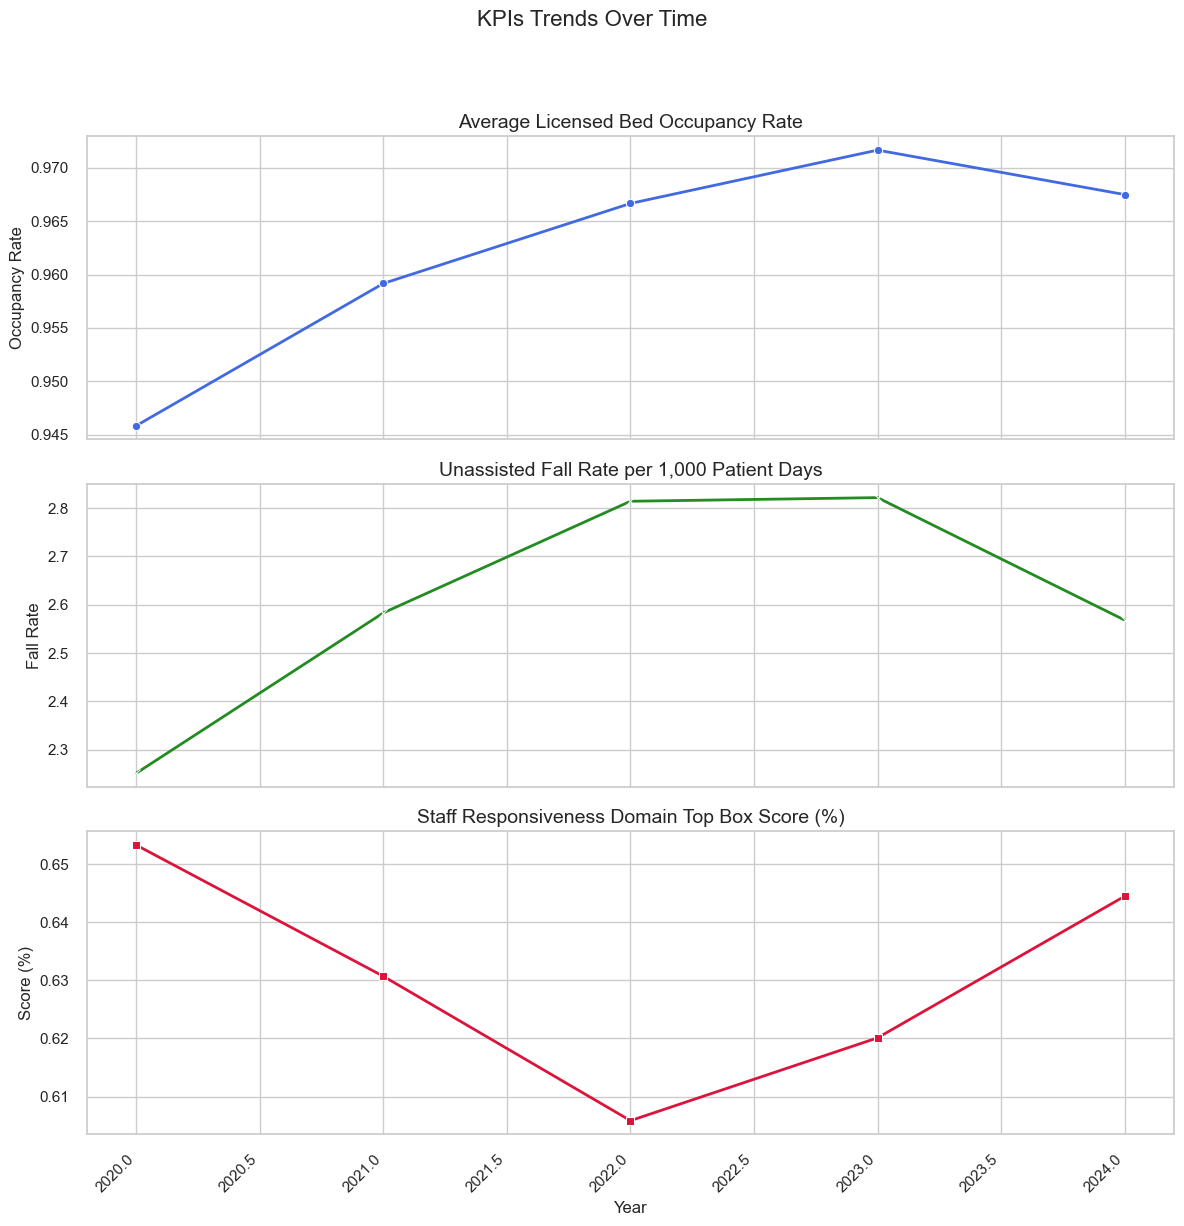

In [189]:
# 1. Convert 'Month' to datetime, handling the "MMM-YY" format
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
df['Year'] = df['Month'].dt.year

# Calculate yearly averages for smoothing
yearly_averages = df.groupby('Year').agg(
    Avg_Occupancy=('Average Licensed Bed Occupancy Rate', 'mean'),
    Avg_FallRate=('Unassisted Fall Rate per 1,000 Patient Days', 'mean'),
    Avg_Responsiveness=('Staff Responsiveness Domain Top Box Score %', 'mean')
).reset_index()


# Set the style of the plot
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Plot Average Licensed Bed Occupancy Rate
sns.lineplot(data=yearly_averages, x='Year', y='Avg_Occupancy', ax=axes[0], marker='o', color='royalblue', linewidth=2)
axes[0].set_title('Average Licensed Bed Occupancy Rate', fontsize=14)
axes[0].set_ylabel('Occupancy Rate', fontsize=12)

# Plot Unassisted Fall Rate per 1,000 Patient Days
sns.lineplot(data=yearly_averages, x='Year', y='Avg_FallRate', ax=axes[1], marker='x', color='forestgreen', linewidth=2)
axes[1].set_title('Unassisted Fall Rate per 1,000 Patient Days', fontsize=14)
axes[1].set_ylabel('Fall Rate', fontsize=12)

# Plot Staff Responsiveness Domain Top Box Score %
sns.lineplot(data=yearly_averages, x='Year', y='Avg_Responsiveness', ax=axes[2], marker='s', color='crimson', linewidth=2)
axes[2].set_title('Staff Responsiveness Domain Top Box Score (%)', fontsize=14)
axes[2].set_ylabel('Score (%)', fontsize=12)

# Rotate month labels for better readability
plt.xticks(rotation=45, ha='right')  # Improved rotation

# Add labels and title
plt.xlabel('Year', fontsize=12)
fig.suptitle('KPIs Trends Over Time', fontsize=16, y=1.02)  # Overall title

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust top for suptitle

# Display the plot
plt.show()

# Yearly KPI Summary: Median and Standard Deviation Analysis

In [180]:

# Calculate yearly medians and standard deviations (using CORRECT column names)
yearly_data = df.groupby('Year').agg(
    Med_Occupancy=('Average Licensed Bed Occupancy Rate', 'median'),
    Med_Responsiveness=('Staff Responsiveness Domain Top Box Score %', 'median'),
    Med_Falls=('Unassisted Fall Rate per 1,000 Patient Days', 'median'),
    Std_Occupancy=('Average Licensed Bed Occupancy Rate', 'std'),
    Std_Responsiveness=('Staff Responsiveness Domain Top Box Score %', 'std'),
    Std_Falls=('Unassisted Fall Rate per 1,000 Patient Days', 'std')
).reset_index()

# Calculate totals (medians of medians and means of standard deviations)
total_data = pd.DataFrame({
    'Year': ['Total'],
    'Med_Occupancy': [yearly_data['Med_Occupancy'].median()],
    'Med_Responsiveness': [yearly_data['Med_Responsiveness'].median()],
    'Med_Falls': [yearly_data['Med_Falls'].median()],
    'Std_Occupancy': [yearly_data['Std_Occupancy'].mean()],
    'Std_Responsiveness': [yearly_data['Std_Responsiveness'].mean()],
    'Std_Falls': [yearly_data['Std_Falls'].mean()]
})

# Concatenate yearly and total data
final_data = pd.concat([yearly_data, total_data], ignore_index=True)

# Format and print the table
header = [
    "Year", "Median of Bed Occupancy Rate", "Median of Staff Responsiveness", 
    "Median of Unassisted Fall %", "Standard deviation of Bed Occupancy Rate",
    "Standard deviation of Staff Responsiveness", "Standard deviation of Unassisted Fall %"
]

# Formatting for the table
format_dict = {  # Dictionary for formatting each column
    'Year': '{:<8}',
    'Med_Occupancy': '{:20.2f}',
    'Med_Responsiveness': '{:20.2f}',
    'Med_Falls': '{:20.2f}',
    'Std_Occupancy': '{:30.2f}',
    'Std_Responsiveness': '{:30.2f}',
    'Std_Falls': '{:30.2f}'
}


print("{:<8} {:<20} {:<20} {:<20} {:<30} {:<30} {:<30}".format(*header))

for _, row in final_data.iterrows():
    formatted_row = [format_dict[col].format(row[col]) for col in final_data.columns]
    print(" ".join(formatted_row))

Year     Median of Bed Occupancy Rate Median of Staff Responsiveness Median of Unassisted Fall % Standard deviation of Bed Occupancy Rate Standard deviation of Staff Responsiveness Standard deviation of Unassisted Fall %
2020                     0.95                 0.67                 2.26                           0.05                           0.06                           0.64
2021                     0.95                 0.64                 2.50                           0.02                           0.05                           0.43
2022                     0.96                 0.61                 2.86                           0.02                           0.02                           0.41
2023                     0.98                 0.62                 2.94                           0.02                           0.03                           0.38
2024                     0.96                 0.65                 2.67                           0.02                 

# Yearly Median KPIs and Percentage Changes

In [190]:


# Calculate yearly medians (using CORRECT column names)
yearly_data = df.groupby('Year').agg(
    Med_Occupancy=('Average Licensed Bed Occupancy Rate', 'median'),
    Med_Falls=('Unassisted Fall Rate per 1,000 Patient Days', 'median'),
    Med_Responsiveness=('Staff Responsiveness Domain Top Box Score %', 'median')
).reset_index()

# Calculate percentage change from the previous year using medians
yearly_data['Occupancy_Change'] = yearly_data['Med_Occupancy'].pct_change() * 100
yearly_data['Falls_Change'] = yearly_data['Med_Falls'].pct_change() * 100
yearly_data['Responsiveness_Change'] = yearly_data['Med_Responsiveness'].pct_change() * 100

# Format the data for the table
table_data = []
for i in range(len(yearly_data)):
    row = [
        yearly_data['Year'][i],
        f"{yearly_data['Med_Occupancy'][i]:.2f}",
        f"{yearly_data['Med_Falls'][i]:.2f}",
        f"{yearly_data['Med_Responsiveness'][i]:.2f}"
    ]

    if i > 0:  # Add changes starting from the second year
        row[1] += f" ({yearly_data['Occupancy_Change'][i]:.2f}%)"
        row[2] += f" ({yearly_data['Falls_Change'][i]:.2f}%)"
        row[3] += f" ({yearly_data['Responsiveness_Change'][i]:.2f}%)"

    table_data.append(row)

# Print the table
header = ["Year", "Bed Occupancy Rate", "Unassisted Fall %", "Staff Responsiveness %"]
print("{:<8} {:<25} {:<20} {:<25}".format(*header))

for row in table_data:
    print("{:<8} {:<25} {:<20} {:<25}".format(*row))

Year     Bed Occupancy Rate        Unassisted Fall %    Staff Responsiveness %   
2020     0.95                      2.26                 0.67                     
2021     0.95 (0.53%)              2.50 (10.84%)        0.64 (-4.88%)            
2022     0.96 (0.52%)              2.86 (14.17%)        0.61 (-5.34%)            
2023     0.98 (2.08%)              2.94 (2.80%)         0.62 (2.57%)             
2024     0.96 (-1.53%)             2.67 (-9.18%)        0.65 (4.99%)             


# Summary of KPI Trends (2020 to 2024)

In [181]:
# Calculate yearly medians (using CORRECT column names)
yearly_data = df.groupby('Year').agg(
    Med_Occupancy=('Average Licensed Bed Occupancy Rate', 'median'),
    Med_Falls=('Unassisted Fall Rate per 1,000 Patient Days', 'median'),
    Med_Responsiveness=('Staff Responsiveness Domain Top Box Score %', 'median')
).reset_index()

# Calculate total percentage change from 2020 to 2024
def calculate_total_change(metric):
    try:  # Handle potential KeyError if year is missing
        start_value = yearly_data.loc[yearly_data['Year'] == 2020, metric].values[0]
        end_value = yearly_data.loc[yearly_data['Year'] == 2024, metric].values[0]
        return ((end_value - start_value) / start_value) * 100
    except IndexError:
        return None  # Or handle as you see fit

total_occupancy_change = calculate_total_change('Med_Occupancy')
total_responsiveness_change = calculate_total_change('Med_Responsiveness')
total_falls_change = calculate_total_change('Med_Falls')

# Determine trend descriptions (you can customize these)
def determine_trend(change):
    if change is None:  # Handle cases where change is None
        return "N/A"
    elif change > 10:
        return "Increased significantly"
    elif change < -10:
        return "Decreased significantly"
    elif change > 0:
        return "Increased"
    elif change < 0:
        return "Decreased"
    else:
        return "Stable"

occupancy_trend = determine_trend(total_occupancy_change)
responsiveness_trend = determine_trend(total_responsiveness_change)
falls_trend = determine_trend(total_falls_change)

# Create the summary table data (handling None values)
summary_data = [
    ["Bed Occupancy Rate", f"{total_occupancy_change:.2f}%" if total_occupancy_change is not None else "N/A", occupancy_trend],
    ["Staff Responsiveness %", f"{total_responsiveness_change:.2f}%" if total_responsiveness_change is not None else "N/A", responsiveness_trend],
    ["Unassisted Fall %", f"{total_falls_change:.2f}%" if total_falls_change is not None else "N/A", falls_trend]
]

# Print the summary table
header = ["KPI", "Total Change (2020 to 2024)", "Trend"]
print("{:<25} {:<25} {:<25}".format(*header))

for row in summary_data:
    print("{:<25} {:<25} {:<25}".format(*row))

KPI                       Total Change (2020 to 2024) Trend                    
Bed Occupancy Rate        1.58%                     Increased                
Staff Responsiveness %    -3.03%                    Decreased                
Unassisted Fall %         18.14%                    Increased significantly  


# correlation analysis

In [191]:

# 5.1: Pearson correlation for linear relationships
pearson_corr_matrix = df[['Average Licensed Bed Occupancy Rate', 'Unassisted Fall %', 'Staff Responsiveness Domain Top Box Score %']].corr(method='pearson')
print("Pearson Correlation Matrix:\n", pearson_corr_matrix)

Pearson Correlation Matrix:
                                              Average Licensed Bed Occupancy Rate  \
Average Licensed Bed Occupancy Rate                                     1.000000   
Unassisted Fall %                                                       0.700112   
Staff Responsiveness Domain Top Box Score %                            -0.371821   

                                             Unassisted Fall %  \
Average Licensed Bed Occupancy Rate                   0.700112   
Unassisted Fall %                                     1.000000   
Staff Responsiveness Domain Top Box Score %          -0.791340   

                                             Staff Responsiveness Domain Top Box Score %  
Average Licensed Bed Occupancy Rate                                            -0.371821  
Unassisted Fall %                                                              -0.791340  
Staff Responsiveness Domain Top Box Score %                                     1.000000  


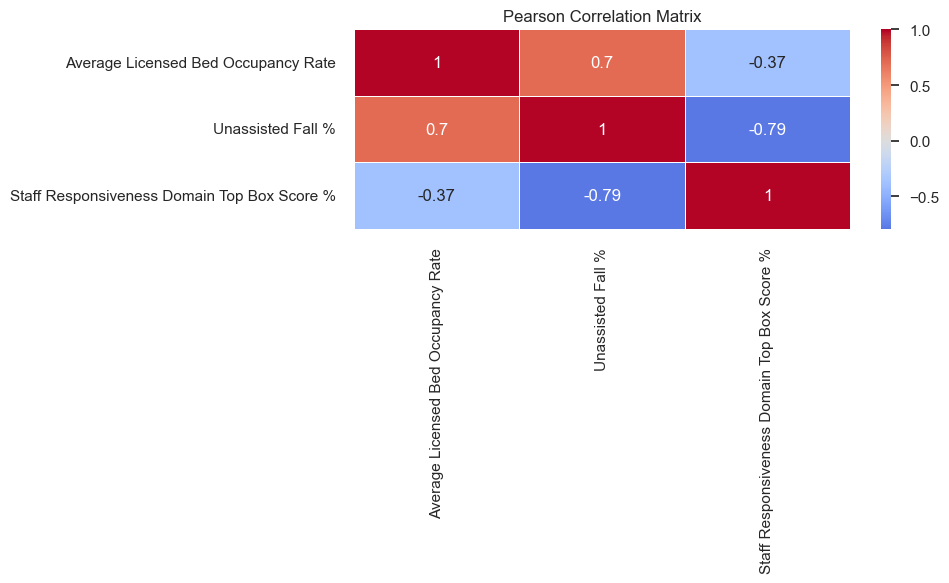

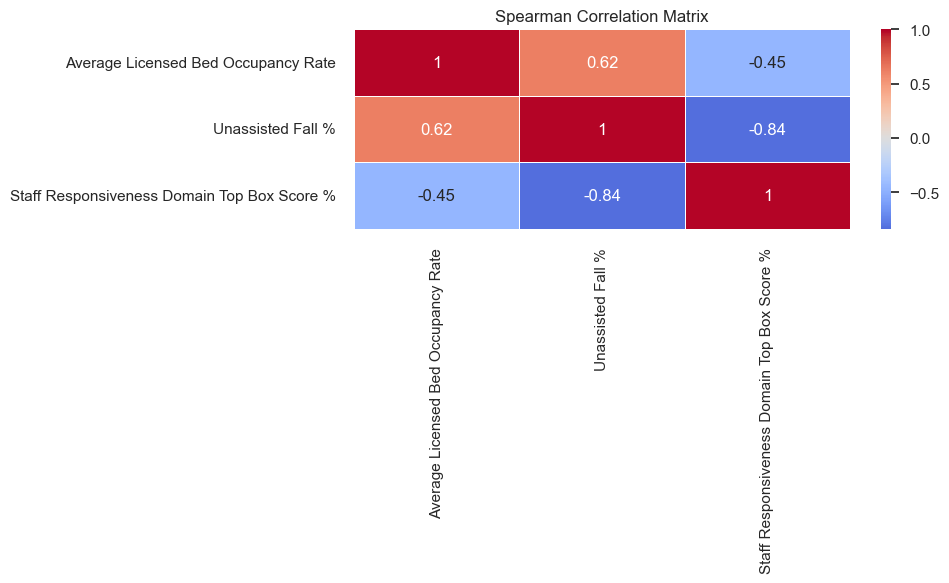

In [192]:
# 5.3: Visualize the correlation matrix using heatmaps
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.tight_layout()
plt.show()

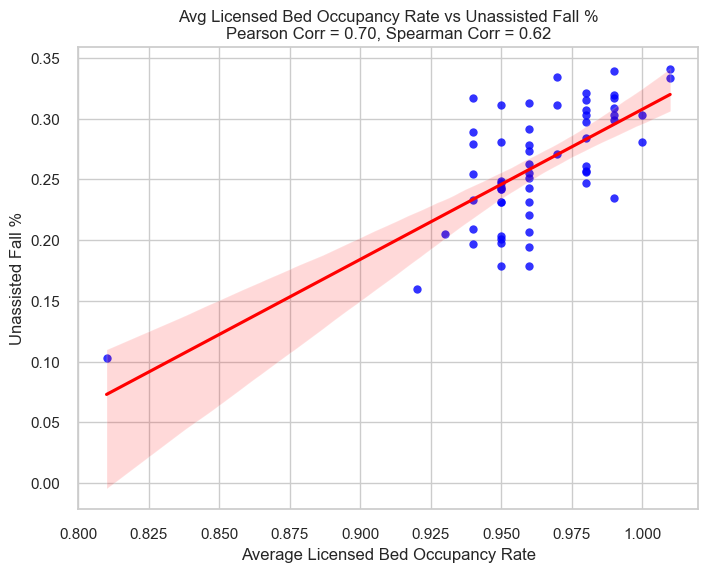

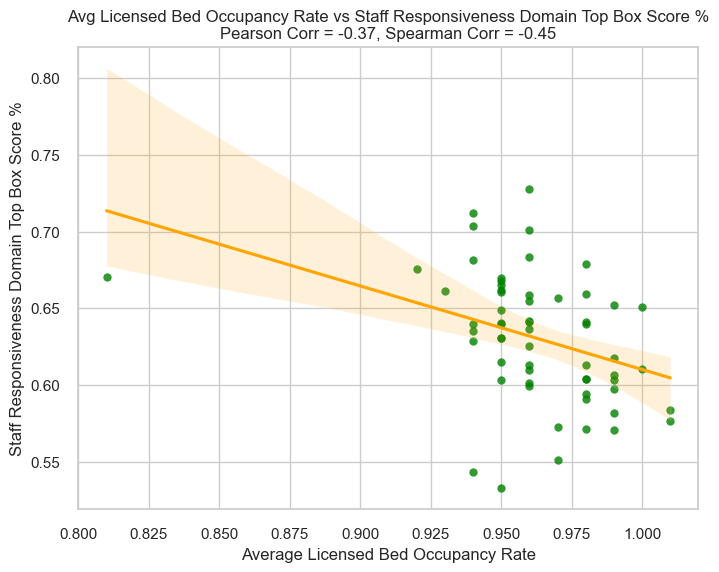

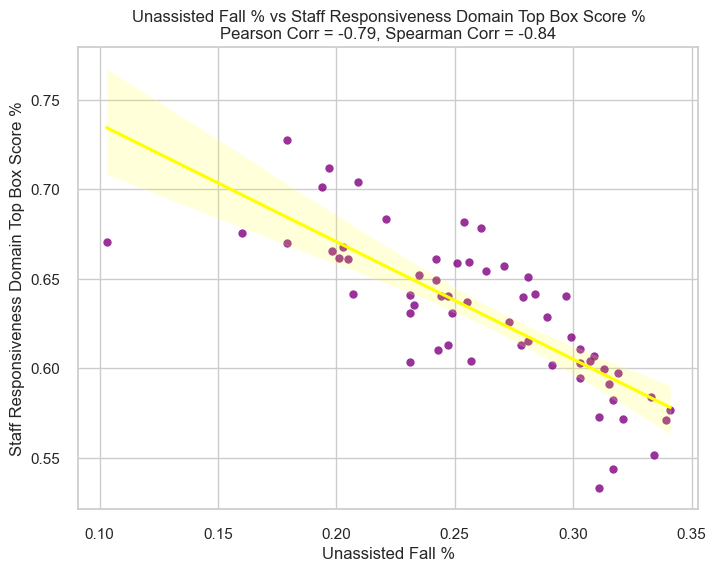

In [193]:
# Calculate Pearson and Spearman correlation for each pair of variables
pearson_corr_1 = df[['Average Licensed Bed Occupancy Rate', 'Unassisted Fall %']].corr(method='pearson')
spearman_corr_1 = df[['Average Licensed Bed Occupancy Rate', 'Unassisted Fall %']].corr(method='spearman')

pearson_corr_2 = df[['Average Licensed Bed Occupancy Rate', 'Staff Responsiveness Domain Top Box Score %']].corr(method='pearson')
spearman_corr_2 = df[['Average Licensed Bed Occupancy Rate', 'Staff Responsiveness Domain Top Box Score %']].corr(method='spearman')

pearson_corr_3 = df[['Unassisted Fall %', 'Staff Responsiveness Domain Top Box Score %']].corr(method='pearson')
spearman_corr_3 = df[['Unassisted Fall %', 'Staff Responsiveness Domain Top Box Score %']].corr(method='spearman')

# Scatter plot with regression line for AverageLicensedBedOccupancyRate vs UnassistedFall% with both Pearson and Spearman correlations
plt.figure(figsize=(8, 6))
sns.regplot(x='Average Licensed Bed Occupancy Rate', y='Unassisted Fall %', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f'Avg Licensed Bed Occupancy Rate vs Unassisted Fall %\nPearson Corr = {pearson_corr_1.iloc[0, 1]:.2f}, Spearman Corr = {spearman_corr_1.iloc[0, 1]:.2f}')
plt.xlabel('Average Licensed Bed Occupancy Rate')
plt.ylabel('Unassisted Fall %')
plt.show()

# Scatter plot with regression line for AverageLicensedBedOccupancyRate vs StaffResponsivenessDomainTopBoxScore% with both Pearson and Spearman correlations
plt.figure(figsize=(8, 6))
sns.regplot(x='Average Licensed Bed Occupancy Rate', y='Staff Responsiveness Domain Top Box Score %', data=df, scatter_kws={'color': 'green'}, line_kws={'color': 'orange'})
plt.title(f'Avg Licensed Bed Occupancy Rate vs Staff Responsiveness Domain Top Box Score %\nPearson Corr = {pearson_corr_2.iloc[0, 1]:.2f}, Spearman Corr = {spearman_corr_2.iloc[0, 1]:.2f}')
plt.xlabel('Average Licensed Bed Occupancy Rate')
plt.ylabel('Staff Responsiveness Domain Top Box Score %')
plt.show()

# Scatter plot with regression line for UnassistedFall% vs StaffResponsivenessDomainTopBoxScore% with both Pearson and Spearman correlations
plt.figure(figsize=(8, 6))
sns.regplot(x='Unassisted Fall %', y='Staff Responsiveness Domain Top Box Score %', data=df, scatter_kws={'color': 'purple'}, line_kws={'color': 'yellow'})
plt.title(f'Unassisted Fall % vs Staff Responsiveness Domain Top Box Score %\nPearson Corr = {pearson_corr_3.iloc[0, 1]:.2f}, Spearman Corr = {spearman_corr_3.iloc[0, 1]:.2f}')
plt.xlabel('Unassisted Fall %')
plt.ylabel('Staff Responsiveness Domain Top Box Score %')
plt.show()
